### 0.1 Libraries

In [514]:
import numpy as np
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#hypothesis testing
from scipy.stats import mannwhitneyu 
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

# <font color='White'> Latar Belakang </font>

Sebuah perusahaan memiliki bidang usaha retail yang menjual barangnya secara online. perusahaan memiliki sebuah gudang yang dibagi ke dalam 5 blok (blok A hingga E). Untuk mengirimkan barang dari gudang ke pelanggan, terdapat 3 mode transportasi yang digunakan yaitu kapal, pesawat dan jalan raya (Ship, Flight and Road). Perusahaan memiliki customer care yang ditugaskan untuk menangani pertanyaan pelanggan terkait pengiriman barang. Pelanggan dapat memberikan rating dari angka 1 hingga 5 atas pengiriman yang telah dilakukan. Perusahaan menyerahkan data atas pengirimannya kepada seorang data analyst untuk dianalisa lebih lanjut terkait kinerja pengiriman yang telah dilakukannya selama ini. 

# <font color='White'>  Pernyataan Masalah </font>

- Perusahaan ingin mengetahui lebih lanjut perihal pelanggan yang dimilikinya. 
- Perusahaan ingin mengetahui kinerja pengiriman barang yang berasal dari warehousenya.
- Perusahaan ingin mengetahui kepuasan pelanggan atas pengiriman barangnya. 

informasi ini akan membantu perusahaan dalam meningkatkan kinerja pengirimannya dan dapat melayani pelanggannya dengan lebih baik.

Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan sebagai berikut :
- Bagaimana perilaku dan karakteristik pelanggan terhadap pembelian produk?
- Bagaimana kinerja perusahaan dalam mengirimkan barang?
- Bagaimana kepuasan pelanggan atas pengiriman barang?



## <font color ='white'> Kamus data </font>
#### Terdapat 12 kolom yang terdapat pada dataset Online Retail Shipping, yakni :
- Cost_of_the_Product   : harga pokok product dalam satuan US dollar.
- Customer_care_calls   : jumlah telepon yang terjadi untuk pengiriman terkait
- Customer_rating       : penilaian konsumen atas pengiriman (1 paling kecil dan 5 paling besar)
- Discount_offered      : diskon yang ditawarkan 
- Gender                : Pria dan Wanita (Male dan Female)
- ID                    : nomor id pelanggan
- Mode_of_Shipment      : mode pengiriman barang (kapal, pesawat dan jalan)
- Prior_purchases       : jumlah pembelian sebelumnya.
- Product Importance    : perusahaan mengkategorikan produk kedalam beberapa parameter (low, medium, high)
- Warehouse_block       : blok gudang asal barang berasal
- Weight_in_gms         : berat dalam satuan gram


In [515]:
df = pd.read_csv('Online Retail Shipping.csv')

## Data Understanding and Cleaning


In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Insights :
- Berdasarkan informasi ini terdapat 8 kolom dengan tipe data integer, 4 kolom str (object).
- Tidak terdapat kolom yang memiliki nilai null.

In [517]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [518]:
df.duplicated().sum()

0

insights :
- Tidak terdapat data yang duplikat pada seluruh row

In [519]:
df['ID'].duplicated().sum()

0

insights :
- Tidak terdapat data yang duplikat pada primary key id pelanggan

## Data Understanding 

Setelah memastikan bahwa data yang dimiliki sudah siap untuk dianalisa, berikut adalah sekilas informasi perihal dataset yang digunakan.

In [520]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().head(5).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(10999, 12)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,10999,"[1, 2, 3, 4, 5]"
1,Warehouse_block,object,0,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,object,0,3,"[Flight, Ship, Road]"
3,Customer_care_calls,int64,0,6,"[4, 2, 3, 5, 6]"
4,Customer_rating,int64,0,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,int64,0,215,"[177, 216, 183, 176, 184]"
6,Prior_purchases,int64,0,8,"[3, 2, 4, 6, 5]"
7,Product_importance,object,0,3,"[low, medium, high]"
8,Gender,object,0,2,"[F, M]"
9,Discount_offered,int64,0,65,"[44, 59, 48, 10, 46]"


Untuk mengetahui apakah sebaran data itu terdistribusi secara normal, maka perlu dibuat distribution plot

In [521]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [522]:
col_numeric = ['Customer_care_calls',
               'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 
               'Discount_offered', 'Weight_in_gms']


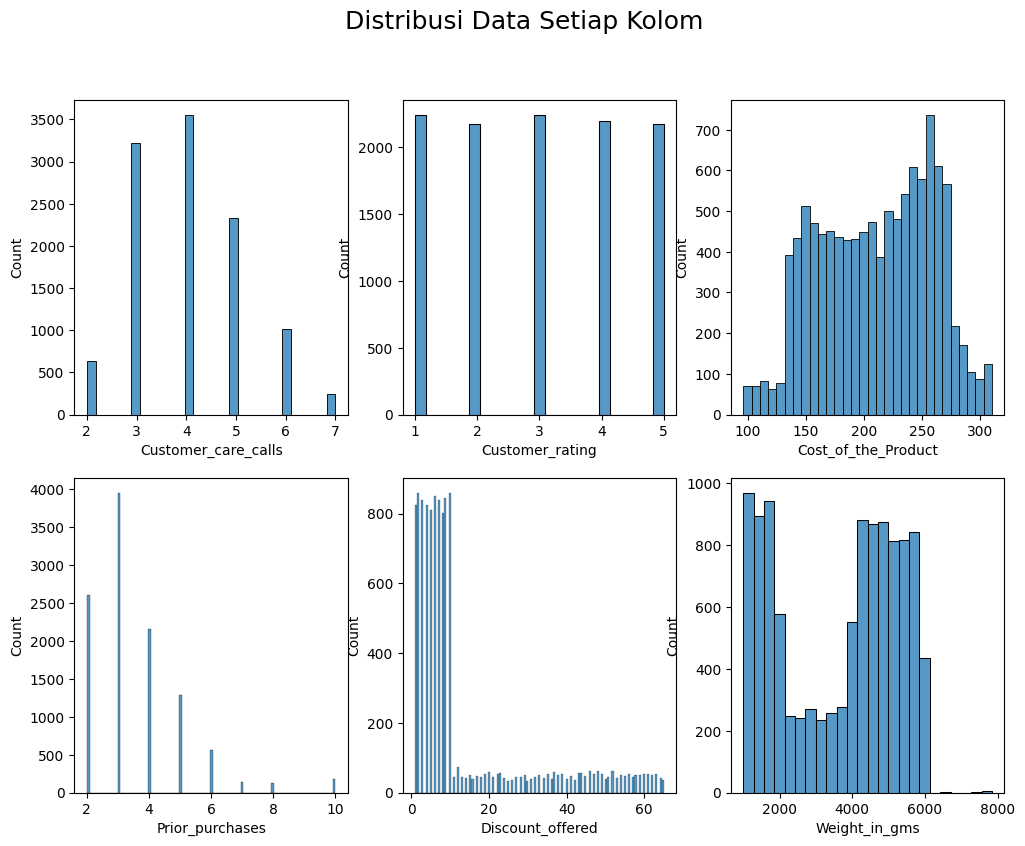

In [523]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(12,9))
plt.suptitle("Distribusi Data Setiap Kolom", size = 18)
counter1 = 0
counter2 = 0
for col in col_numeric:
    sns.histplot(data = df, x = col, ax=axes[counter2][counter1])
    if counter1 != 3:
        counter1 +=1
    if counter1 == 3:
        counter2 += 1
        counter1 = 0
plt.show()
  

In [524]:
from scipy.stats import normaltest

In [525]:
col_numeric = ['Customer_care_calls',
               'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 
               'Discount_offered', 'Weight_in_gms']

In [526]:
for i in col_numeric:
    pvalue = normaltest(df[f'{i}'])[1]
    if pvalue > 0.05 :
        print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data {i} terdistribusi normal')
    else :
        print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data {i} TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data Customer_care_calls TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data Customer_rating TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data Cost_of_the_Product TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data Prior_purchases TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data Discount_offered TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data Weight_in_gms TIDAK terdistribusi normal


Insights :
- Sehingga untuk melakukan uji hipotesis menggunakan non-parametric tests.

In [527]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Insights :
- Terdapat 10999 pelanggan berbeda yang pernah melakuan pembelian barang.
- Gap antara Customer_care_calls maksimum dan minimum sebesar 5.
- Hanya 25% pelanggan yang memberikan rating >=4. 
- Berat minimum berada di 1001 dan berat maksimum berada di 7846. 
- Harga barang paling murah berada pada harga $96.  
- Diskon yang diberikan memiliki rentang dari 1 hingga 65.
- Berat paling ringan berada pada angka 1001, sedangkan berat terbesarnya berada di angka 7846. 
- Reached.on.Time 0.596691 berarti hanya 40% barang yang tepat waktu, sisanya terjadi keterlambatan dalam pengiriman. 

### Data Correlation

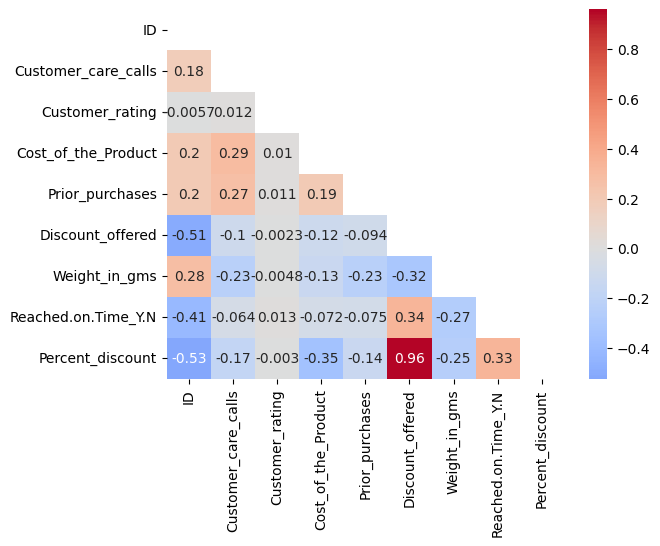

In [528]:
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', center = 0, mask=matriks)
plt.show()

Insights :
- Customer_rating 
    - (Hubungan Positif Lemah)   Semakin tinggi Customer_rating, maka semakin kecil Customer_care_calls.      (0.012)

- Cost_of_the_Product
    - (Hubungan Positif Lemah)   Semakin tinggi cost_of_the_product, maka id semakin besar.                   (0.2)
    - (Hubungan Positif Lemah)   Semakin tinggi cost_of_the_product, maka Customer_care_calls semakin besar.  (0.29)  (Dalami)
    - (Hubungan Positif Lemah)   Semakin tinggi cost_of_the_product, maka Customer_rating semakin besar.      (0.01)   

- Prior Purchases
    - (Hubungan Positif Lemah)   Semakin tinggi Prior_purchases, maka ID semakin besar.                       (0.2)
    - (Hubungan Positif Lemah)   Semakin tinggi Prior_purchases, maka Customer_care_calls semakin besar.      (0.27)  (Dalami)
    - (Hubungan Positif lemah)   Semakin tinggi Prior_purchases, maka Customer_rating semakin besar.          (0.011) (Dalami)
    - (Hubungan Positif Lemah)   Semakin tinggi Prior_purchases, maka Cost_of_the_Product semakin besar.      (0.19)

- Discount_offered 
    - (Hubungan Negatif Moderat) Semakin tinggi discount_offered, maka semakin kecil ID.                      (-0.51)  (Dalami) (Perihal loyalitas)
    - (Hubungan Negatif Lemah)   Semakin tinggi Discount_offered, maka semakin kecil customer_care_calls.     (-0.1)    (Dalami) (Diskon makin gede cc makin kecil)
    - (Hubungan Negatif Lemah)   Semakin tinggi Discount_offered, maka semakin kecil customer_rating.         (-0.0023) (cek)
    - (Hubungan Negatif Lemah)   Semakin tinggi Discount_offered, maka semakin kecil Cost_of_the_product.     (-0.12)   
    - (Hubungan Negatif Lemah)   Semakin tinggi Discount_offered, maka semakin kecil jumlah prior_purchases.  (-0.094) 
 
- Weight_in_gms
    - (Hubungan Positif Moderat) Semakin tinggi Weight_in_gms, maka ID semakin besar.                         (-0.41)
    - (Hubungan Negatif Lemah)   Semakin tinggi Weight_in_gms, maka jumlah customer_care_calls semakin kecil. (-0.23) Makin berat, customer care makin sedikit.
    - (Hubungan Negatif Lemah)   Semakin tinggi Weight_in_gms, maka nilai customer_rating semakin kecil.      (-0.0048) 
    - (Hubungan Negatif Lemah)   Semakin tinggi Weight_in_gms, maka Cost_of_the_Product semakin kecil.        (-0.13) makin berat makin murah
    - (Hubungan Negatif Lemah)   Semakin tinggi Weight_in_gms, maka Prior_purchases semakin kecil.            (-0.23) 
    - (Hubungan Negatif Lemah)   Semakin tinggi Weight_in_gms, maka Discount_offered semakin kecil.           (-0.32) Makin berat makin sedikit discount


In [529]:
df['Weight_in_gms'].describe()

count    10999.000000
mean      3634.016729
std       1635.377251
min       1001.000000
25%       1839.500000
50%       4149.000000
75%       5050.000000
max       7846.000000
Name: Weight_in_gms, dtype: float64

# <font color='white'> Data Preprocessing </font>
- Berdasarkan data dictionary yang diberikan, kolom Warehouse_block seharusnya memiliki nilai A hingga E saja, namun pada data yang ada, terdapat nilai F dan tidak ada nilai yang bernilai E, sehingga perlu dilakukan penyesuaian.

![warehouse_block.JPG](warehouse_block.JPG)

In [530]:
df['Warehouse_block'].value_counts()

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

- Sehingga perlu dilakukan perubahan nilai data yang bernilai F tersebut menjadi E.

In [531]:
df['Warehouse_block'] = np.where(df['Warehouse_block']=='F','E',df['Warehouse_block'])

In [532]:
df['Warehouse_block'].value_counts()

Warehouse_block
E    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Data yang memiliki nilai F sudah diubah menjadi nilai E. 

In [533]:
df.to_excel('df_cleaned.xlsx')

In [534]:
df_corr = df.corr(numeric_only=True, method='spearman')

In [535]:
matriks = np.triu(df_corr)
matriks

array([[ 1.        ,  0.18237136, -0.0057193 ,  0.19543014,  0.19719361,
        -0.50762996,  0.27891201, -0.41182249],
       [ 0.        ,  1.        ,  0.01186202,  0.29369969,  0.27299202,
        -0.10422279, -0.2329359 , -0.06428311],
       [ 0.        ,  0.        ,  1.        ,  0.01024234,  0.01053742,
        -0.00229859, -0.00480264,  0.01310806],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.19421617,
        -0.11581748, -0.13198021, -0.07185043],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.09387173, -0.23467344, -0.07464308],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        , -0.31567655,  0.33510823],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        , -0.26595764],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ]])

#### Weight Status

Mengelompokan barang berdasarkan range berat Weight_in_gms.

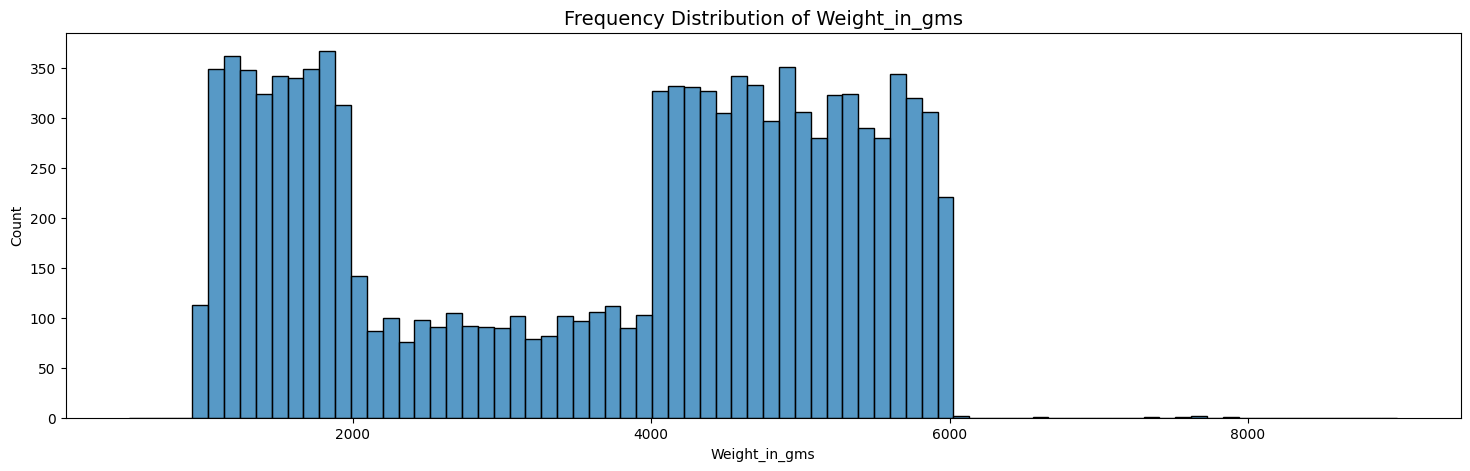

In [536]:
plt.figure(figsize=(18,5))
plt.title("Frequency Distribution of Weight_in_gms", size =14)
sns.histplot(data=df, x='Weight_in_gms', binrange=(500,9000),bins=80)
plt.show()

- Weight_in_gms akan dikelompokkan menjadi 3 kelompok, yaitu : light, middle dan heavy. 
- Untuk kelas light berada pada rentang 0-2000. 
- Untuk kelas middle berada pada rentang 2001-4000.
- Untuk kelas heavy berada pada rentang >=4001


In [537]:
df.tail(11)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10988,10989,A,Ship,4,3,192,4,low,F,2,1830,0
10989,10990,B,Ship,5,1,218,5,medium,F,9,1603,0
10990,10991,C,Ship,5,4,219,6,low,M,3,1098,0
10991,10992,E,Ship,5,2,261,5,medium,M,9,1227,1
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0
10993,10994,E,Ship,5,1,257,6,low,F,1,1150,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,E,Ship,5,2,223,6,medium,M,2,1210,0


In [538]:
def weight_status(weight):
    if weight <=2000:
        return 'Light'
    elif weight <=4000:
        return 'Middle'
    else :
        return 'Heavy'

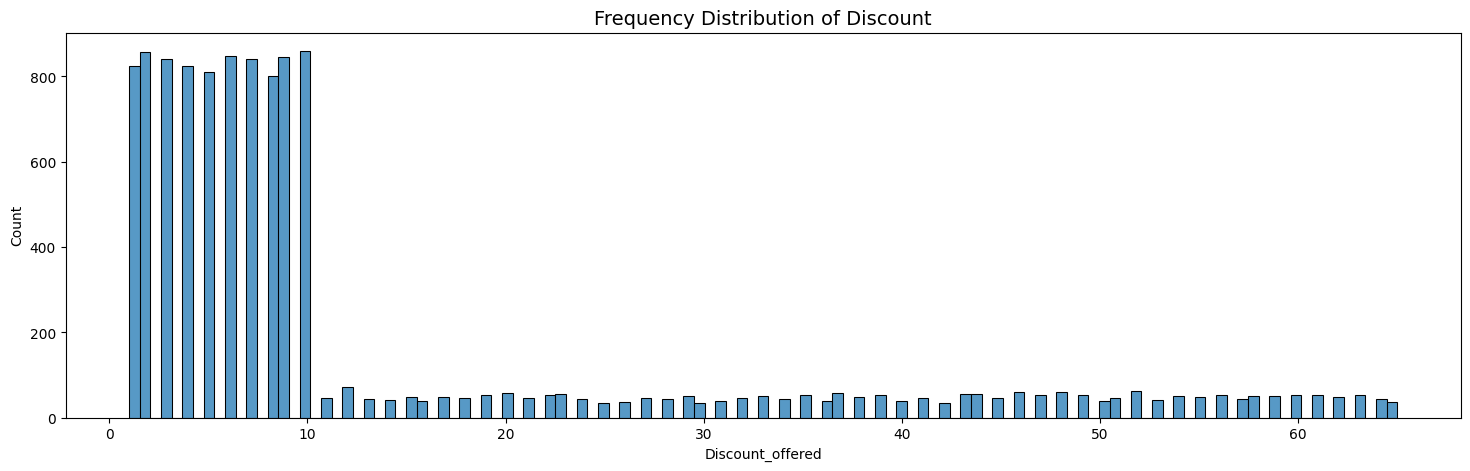

In [539]:
plt.figure(figsize=(18,5))
plt.title("Frequency Distribution of Discount", size =14)
sns.histplot(data=df, x='Discount_offered')
plt.show()

In [540]:
df['Discount_offered'].describe()

count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64

In [541]:
df['Weight_status'] = df['Weight_in_gms'].apply(weight_status)

#### Percent Discount

Mengelompokan discount berdasarkan discount yang diberikan dengan harga produk.

In [542]:
df['Percent_discount'] = round(df['Discount_offered'] / df['Cost_of_the_Product'] * 100,2)
df[['Percent_discount']]

,Percent_discount
0,24.86
1,27.31
2,26.23
3,5.68
4,25.00
...,...
10994,0.40
10995,2.59
10996,1.65
10997,0.90


def discount_status:

In [543]:
def discount_status(weight):
    if weight <=3.33:
        return 'Low (0-3.33)'
    elif weight <=6.295:
        return 'Middle (3.34 - 6.295)'
    else :
        return 'High (>6.295)'

In [544]:
df['Discount_status'] = df['Percent_discount'].apply(discount_status)
df['Discount_status']

0                High (>6.295)
1                High (>6.295)
2                High (>6.295)
3        Middle (3.34 - 6.295)
4                High (>6.295)
                 ...          
10994             Low (0-3.33)
10995             Low (0-3.33)
10996             Low (0-3.33)
10997             Low (0-3.33)
10998    Middle (3.34 - 6.295)
Name: Discount_status, Length: 10999, dtype: object

<hr>

## Data Analysis

Setelah melakukan data cleaning, tahap selanjutnya adalah melakukan analisa data. Pada bagian ini kita akan menjawab pernyataan masalah yang ada. 
Analisa akan dilakukan sesuai dengan urutan pernyataan masalah yaitu :
- 1. Bagaimana karakteristik pelanggan yang melakukan pengiriman barang?
        - Apakah lebih banyak perempuan atau laki-laki yang melakukan pembelian barang? 
        - apakah terdapat perbedaan dari laki-laki atau perempuan dalam hal harga pembelian barang?
        - Lebih banyak laki-laki atau perempuan yang menelpon customer care?
        - apakah terdapat perbedaan antara-laki-laki dan perempuan dalam hal pemberian rating?
        - apakah perempuan lebih banyak membeli produk dengan diskon yang tinggi? 
 

- 2. Bagaimana kinerja perusahaan dalam mengirimkan barang? 
        - Apakah area barang berasal (Warehouse Area) memiliki kinerja yang berbeda dalam mengirimkan barang?
        - Apakah Mode_of_Shipment memiliki kinerja yang berbeda dalam mengirimkan barang?
        - Apakah Product_importance high lebih tepat waktu sampai dibandingkan dengan yang lainnya?
    
    
- 3. Bagaimana kepuasan pelanggan atas pengiriman barang?
        - Bagaimana hubungan antara Reached.on.Time.Y.N dengan Customer_care_calls
        - Bagaimana hubungan antara Reached.on.Time.Y.N dengan Customer_rating
        - Bagaimana hubungan antara Prior_purchases dengan Percent_discount





1. Apakah terdapat perbedaan jumlah barang yang dibeli oleh pelanggan pria dengan wanita?

In [545]:
df['Gender'].value_counts()

Gender
F    5545
M    5454
Name: count, dtype: int64

Insights :
Jumlah pelanggan pria sebanyak 5454, sedangkan jumlah pelanggan wanita sebanyak 5545. 

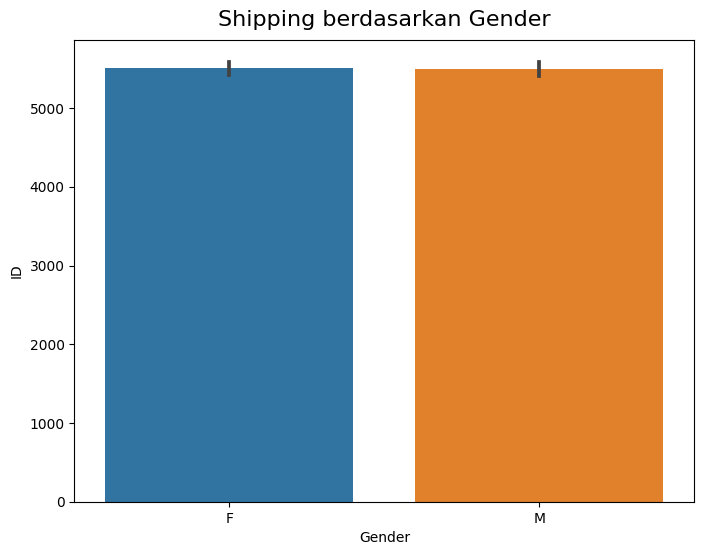

In [546]:
plt.figure(figsize=(8,6))
plt.title('Shipping berdasarkan Gender',size=16, pad=10 )
sns.barplot(data=df,x='Gender',y='ID')
plt.show()

### Insights :
- Jumlah barang yang didistribusikan kepada wanita atau pria tidak berbeda. 

#### Hal pertama yang akan dianalisa adalah perihal pelanggan. Kita ingin mengetahui semua hal yang terkait dengan pelanggan.

2. Apakah terdapat perbedaan harga barang antara pelanggan pria dengan pelanggan wanita?

Hipotesis :
-   Ho : Median Cost_of_the_Product F = Median Cost_of_the_Product M
-   Ha : Median Cost_of_the_Product F != Median Cost_of_the_Product M

In [548]:
df_harga_gender = df.groupby(['Gender'])[['Cost_of_the_Product']].median().reset_index()
df_harga_gender

,Gender,Cost_of_the_Product
0,F,212.0
1,M,217.0


In [549]:
stat, pvalue  = mannwhitneyu(
    df[df['Gender']=="M"]['Cost_of_the_Product'],
    df[df['Gender']=="F"]['Cost_of_the_Product'],
    alternative = "two-sided"
)

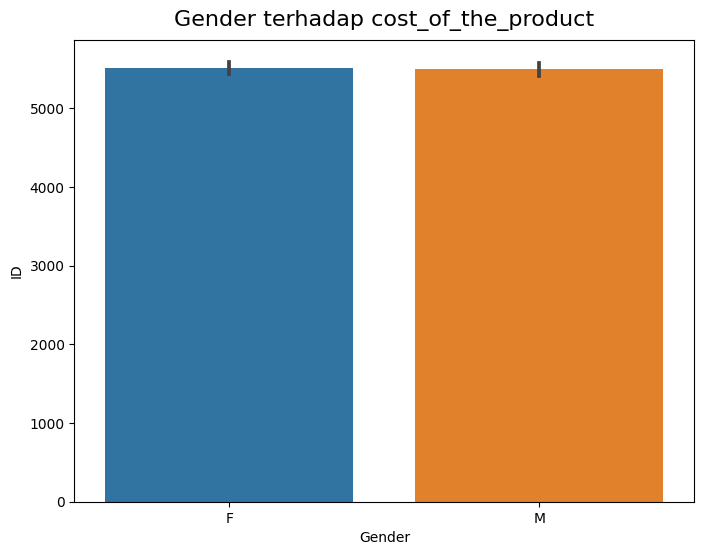

In [550]:
plt.figure(figsize=(8,6))
plt.title('Gender terhadap cost_of_the_product', size=16, pad=10 )
sns.barplot(data=df,x='Gender',y='ID')
plt.show()

Insights :
- Ternyata tidak terdapat perbedaan median Cost_of_the_Product yang signifikan antara Gender M dibandingkan dengan Gender F

In [551]:
#conclusion
if pvalue > 0.05:
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa median Cost_of_the_Product Gender M
          Tidak Sama dengan median Cost_of_the_Product Gender F
          (Mediannya TIDAK berbeda signifikan)
          ''')
else:
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa median Cost_of_the_Product Gender M
          Tidak Sama dengan median Cost_of_the_Product Gender F
          (Mediannya TIDAK berbeda signifikan)
          ''')


          pvalue = 0.03332. pvalue <= 0.05. Berhasil menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa median Cost_of_the_Product Gender M
          Tidak Sama dengan median Cost_of_the_Product Gender F
          (Mediannya TIDAK berbeda signifikan)
          


3. Perempuan lebih banyak menelpon customer care.

Hipotesis :
- H0 : Wanita lebih banyak menelpon customer care dibanding pria
- Ha : Wanita tidak lebih banyak menelpon customer care dibanding pria

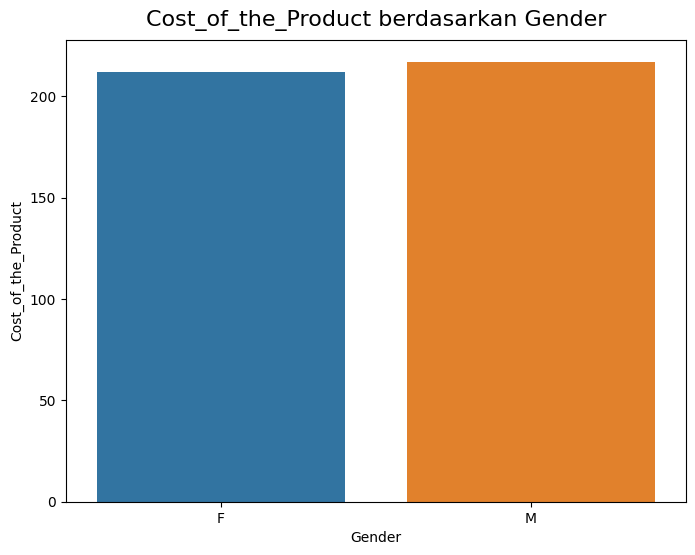

In [552]:
plt.figure(figsize=(8,6))
plt.title('Cost_of_the_Product berdasarkan Gender', size=16, pad=10)
sns.barplot(data = df_harga_gender, x='Gender', y='Cost_of_the_Product')
plt.show()

Insights : 
- Cost_of_the_Product pada gender M sedikit lebih tinggi dibandingkan dengan gender F. 

In [553]:
df_gender_calls = df.groupby('Gender')[['Customer_care_calls']].median().reset_index()

In [554]:
stat, pvalue  = mannwhitneyu(
    df_gender_calls[df_gender_calls['Gender']=="M"]['Customer_care_calls'],
    df_gender_calls[df_gender_calls['Gender']=="F"]['Customer_care_calls'],
    alternative = "two-sided"
)

In [555]:
#conclusion
if pvalue>0.05:
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa median customer_care_calls Male
          Tidak Sama dengan median customer_care_calls Female
          (Mediannya TIDAK berbeda signifikan)
          ''')
else:
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa median customer_care_calls Male
          Tidak sama dengan median customer_care_calls Female
          (Mediannya berbeda signifikan)
          ''')


          pvalue = 1.00000. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa median customer_care_calls Male
          Tidak Sama dengan median customer_care_calls Female
          (Mediannya TIDAK berbeda signifikan)
          


In [556]:
df_gender_discount = df.groupby(['Gender','Discount_status'])[['Discount_offered']].median().reset_index()
df_gender_discount

,Gender,Discount_status,Discount_offered
0,F,High (>6.295),38.0
1,F,Low (0-3.33),4.0
2,F,Middle (3.34 - 6.295),9.0
3,M,High (>6.295),37.0
4,M,Low (0-3.33),4.0
5,M,Middle (3.34 - 6.295),9.0


In [557]:
stat, pvalue  = mannwhitneyu(
    df_gender_discount[df_gender_discount['Gender']=="M"]['Discount_offered'],
    df_gender_discount[df_gender_discount['Gender']=="F"]['Discount_offered'],
    alternative = "two-sided"
)

In [558]:
#conclusion
if pvalue>0.05:
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa median Discount_offered Male
          Tidak Sama dengan median Discount_offered Female
          (Mediannya TIDAK berbeda signifikan)
          ''')
else:
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa median Discount_offered Male
          Tidak sama dengan median Discount_offered Female
          (Mediannya berbeda signifikan)
          ''')


          pvalue = 1.00000. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa median Discount_offered Male
          Tidak Sama dengan median Discount_offered Female
          (Mediannya TIDAK berbeda signifikan)
          


Insights :
- konsumen wanita tidak membeli barang berdasarkan discount offerednya karena baik wanita ataupun pria tidak berbeda signifikan.

#### Kinerja Pengiriman
Untuk menjawab permasalahan pada nomor 2, kita dapat memulai analisa dari warehouse_block terlebih dahulu, karena seluruh pengiriman barang awalnya berasal dari gudang. Berikut adalah ilustrasi proses shipping yang terjadi. 

<img src="shipping.JPG" alt="drawing" style="width:850px;vertical-align:middle;"/>

### <font color='white'> Warehouse block </font>
Kolom warehouse_block merupakan area gudang yang digunakan untuk menyimpan barang yang dipesan oleh konsumen. Gudang memiliki 5 block area dimulai dari Block A hingga Block E.

<img src="warehouse_blocks.JPG" alt="drawing" style="width:650px;vertical-align:middle;"/>

In [597]:
df.groupby('Warehouse_block')[['ID']].count().reset_index(drop=False).rename(columns={'ID':'Jumlah Barang'})

,Warehouse_block,Jumlah Barang
0,A,1833
1,B,1833
2,C,1833
3,D,1834
4,E,3666


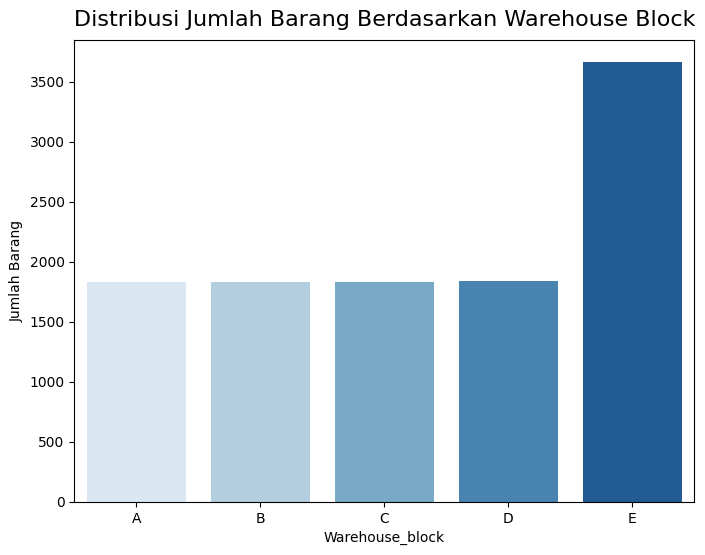

In [598]:
plt.figure(figsize=(8,6))
plt.title('Distribusi Jumlah Barang Berdasarkan Warehouse Block',size=16, pad=10 )
sns.barplot(data=df.groupby('Warehouse_block')[['ID']].count().reset_index(drop=False).rename(columns={'ID':'Jumlah Barang'}).sort_values(by='Jumlah Barang'),x='Warehouse_block',y='Jumlah Barang', palette="Blues")
plt.show()

Insights :
- Warehouse E mendistribusikan barang jauh lebih banyak dibandingkan dengan warehouse block lainnya. 
- Warehouse block A, B dan C mendistribusikan barang dengan jumlah yang sama yaitu 1833. 

In [599]:
df_reached = df.groupby(['Warehouse_block'])[['Reached.on.Time_Y.N']].count().reset_index(drop=False).rename(columns={'Reached.on.Time_Y.N':'Reached.on.Time_Y.N Total'})
df_reached

,Warehouse_block,Reached.on.Time_Y.N Total
0,A,1833
1,B,1833
2,C,1833
3,D,1834
4,E,3666


In [600]:
df0 = df[df['Reached.on.Time_Y.N']==0]
df_reached0 = df0.groupby(['Warehouse_block'])[['Reached.on.Time_Y.N']].count().reset_index(drop=False)
df_reached0

,Warehouse_block,Reached.on.Time_Y.N
0,A,758
1,B,729
2,C,739
3,D,738
4,E,1472


In [601]:
df_reached_total = pd.merge(df_reached, df_reached0, on='Warehouse_block')
df_reached_total['arrival_percentage'] = round(df_reached_total['Reached.on.Time_Y.N'] / df_reached_total['Reached.on.Time_Y.N Total'],2)
df_reached_total

,Warehouse_block,Reached.on.Time_Y.N Total,Reached.on.Time_Y.N,arrival_percentage
0,A,1833,758,0.41
1,B,1833,729,0.40
2,C,1833,739,0.40
3,D,1834,738,0.40
4,E,3666,1472,0.40


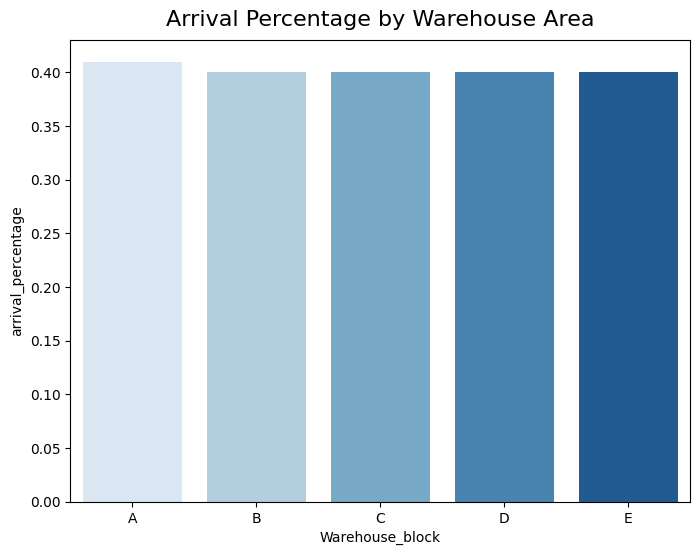

In [602]:
plt.figure(figsize=(8,6))
plt.title('Arrival Percentage by Warehouse Area',size=16, pad=10 )
sns.barplot(data = df_reached_total, x='Warehouse_block',y= 'arrival_percentage', palette="Blues")
plt.show()

Insights :
- Warehouse_block A memiliki persentase tertinggi dalam ketepatan pengiriman 41%.
- Warehouse_block B-E lainnya memiliki persentase 40%.
- Lokasi barang berasal tidak mempengaruhi ketepatan waktu dalam mengirimkan barang.


Warehouse_block terhadap Weight in gms

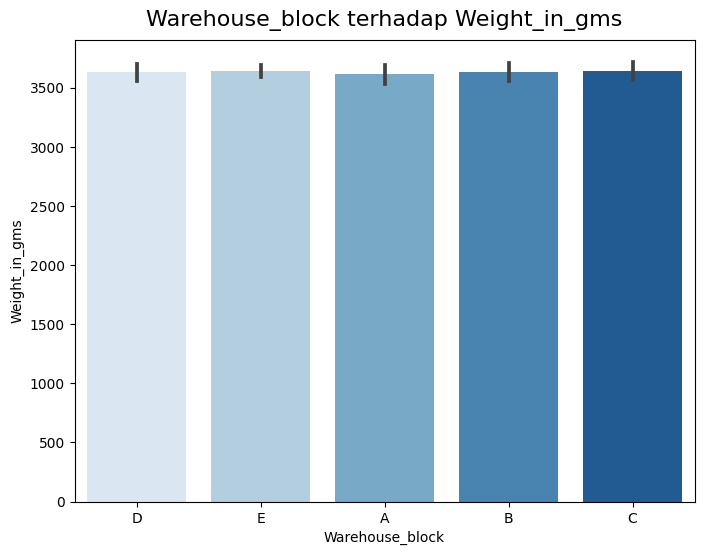

In [603]:
plt.figure(figsize=(8,6))
plt.title('Warehouse_block terhadap Weight_in_gms',size=16, pad=10 )
sns.barplot(data = df, x ='Warehouse_block', y = 'Weight_in_gms', palette="Blues")
plt.show()

- Perusahaan tidak memiliki strategi untuk menempatkan barang berdasarkan berat. 
- Rata-rata berat-barang pada semua warehouse_block tidak berbeda signifikan.

In [604]:
stat, pvalue = kruskal(
    df[df['Warehouse_block']=="A"]['Weight_in_gms'],
    df[df['Warehouse_block']=="B"]['Weight_in_gms'],
    df[df['Warehouse_block']=="C"]['Weight_in_gms'],
    df[df['Warehouse_block']=="D"]['Weight_in_gms'],
    df[df['Warehouse_block']=="E"]['Weight_in_gms']
)
pvalue

0.9331148670253023

In [605]:
# conclusion
if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal salah satu kelompok warehouse block ada yang median Weight_in_gms-nya berbeda.
    ''')
else :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal salah satu kelompok warehouse block status ada yang median Weight_in_gms-nya berbeda.
    ''') 


    pvalue = 0.93311. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal salah satu kelompok warehouse block ada yang median Weight_in_gms-nya berbeda.
    


#### Mode of Shipment

In [606]:
df.groupby('Mode_of_Shipment')[['ID']].count().reset_index(drop=False).rename(columns={'ID':'Jumlah Barang'})

,Mode_of_Shipment,Jumlah Barang
0,Flight,1777
1,Road,1760
2,Ship,7462


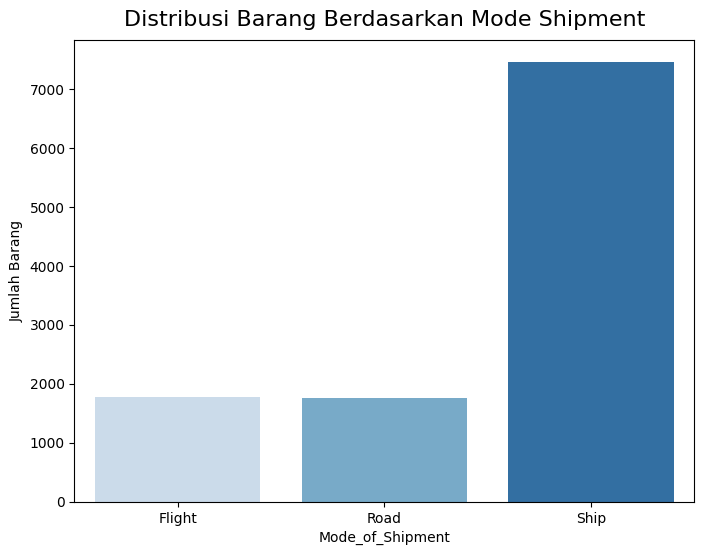

In [607]:
plt.figure(figsize=(8,6))
plt.title('Distribusi Barang Berdasarkan Mode Shipment',size=16, pad=10 )
sns.barplot(data=df.groupby('Mode_of_Shipment')[['ID']].count().reset_index(drop=False).rename(columns={'ID':'Jumlah Barang'}),x='Mode_of_Shipment',y='Jumlah Barang', palette="Blues")
plt.show()

Insights
- Pengiriman menggunakan kapal jauh lebih banyak dibandingkan dengan mode transportasi udara ataupun darat.
- Pengiriman via udara atau darat berbeda sedikit.

In [608]:
df_mode_reached = df.groupby(['Mode_of_Shipment'])[['Reached.on.Time_Y.N']].count().reset_index(drop=False).rename(columns={'Reached.on.Time_Y.N':'Reached.on.Time_Y.N Total'})
df_mode_reached0 = df0.groupby(['Mode_of_Shipment'])[['Reached.on.Time_Y.N']].count().reset_index(drop=False)
df_mode_reached_total = pd.merge(df_mode_reached, df_mode_reached0, on='Mode_of_Shipment')
df_mode_reached_total['arrival_percentage'] = round(df_reached_total['Reached.on.Time_Y.N'] / df_reached_total['Reached.on.Time_Y.N Total'],2)
df_mode_reached_total

,Mode_of_Shipment,Reached.on.Time_Y.N Total,Reached.on.Time_Y.N,arrival_percentage
0,Flight,1777,708,0.41
1,Road,1760,725,0.40
2,Ship,7462,3003,0.40


In [571]:
df2 = df.copy()
df2['Reached.on.Time_Y.N2'] = df['Reached.on.Time_Y.N']

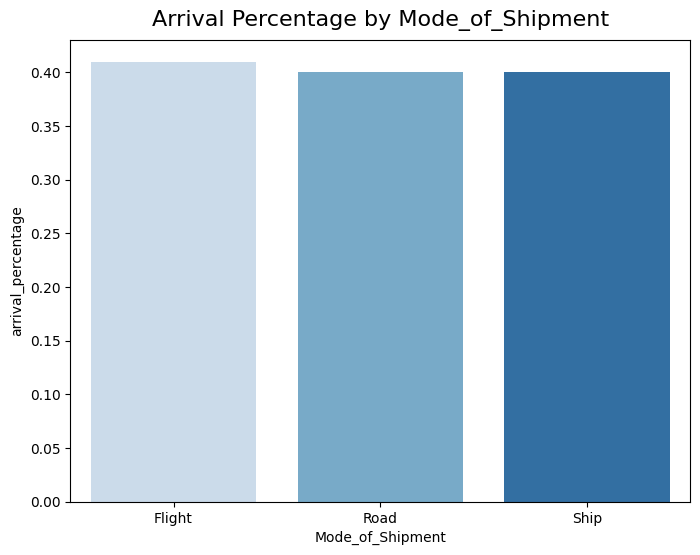

In [609]:
plt.figure(figsize=(8,6))
plt.title('Arrival Percentage by Mode_of_Shipment',size=16, pad=10 )
sns.barplot(data = df_mode_reached_total, x ='Mode_of_Shipment', y = 'arrival_percentage', palette="Blues")
plt.show()

Insights :
    - Secara Persentase, Mode flight lebih tinggi dibandingkan dengan mode lainnya dengan selisih 0.1%


In [573]:
df2_pivot = df2.pivot_table(index = 'Reached.on.Time_Y.N',
               columns = 'Mode_of_Shipment',
               values = 'Reached.on.Time_Y.N2',
               aggfunc = len
               ).reset_index(drop=True)
df2_pivot

Mode_of_Shipment,Flight,Road,Ship
0,708,725,3003
1,1069,1035,4459


Apakah mode tersebut berbeda secara signifikan?

In [574]:
stat, pvalue, dof, expected = chi2_contingency(df2_pivot)
pvalue

0.6895487627593786

In [575]:
#conclusion
if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Mode_of_Shipment dan Reached.on.Time_Y.N ada keterkaitan (dependent)
    (Proporsinya TIDAK berbeda signifikan)
    ''')
else :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa antara Mode_of_Shipment dan Reached.on.Time_Y.N ada keterkaitan (dependent)
    (Proporsinya berbeda signifikan)
    ''')   


    pvalue = 0.68955. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Mode_of_Shipment dan Reached.on.Time_Y.N ada keterkaitan (dependent)
    (Proporsinya TIDAK berbeda signifikan)
    


Insights :
Dikarenakan Mode_of_Shipment tidak berbeda secara signifikan, maka ketepatan waktu pengiriman apabila menggunakan mode yang mana saja itu sama.

Mode_of_Shipment terhadap Weight_in_gms

In [576]:
df.groupby('Mode_of_Shipment')[['Weight_in_gms']].median().reset_index(drop=False).rename(columns={'ID':'Jumlah Barang'})

,Mode_of_Shipment,Weight_in_gms
0,Flight,4152.0
1,Road,4194.5
2,Ship,4141.5


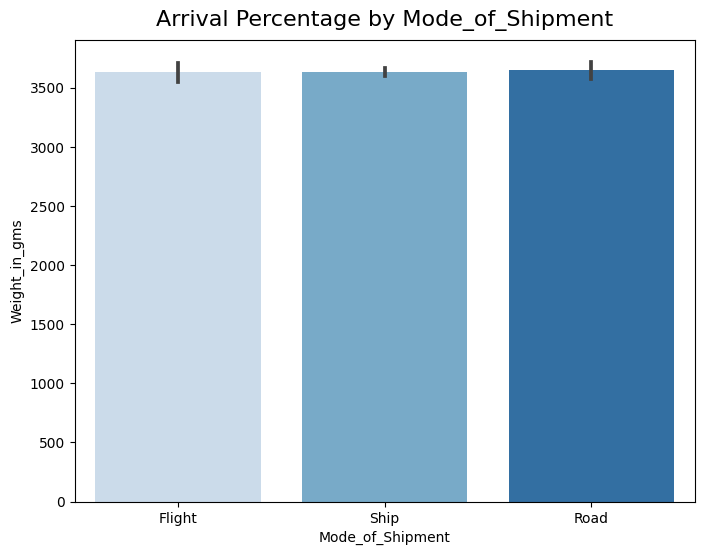

In [577]:
plt.figure(figsize=(8,6))
plt.title('Arrival Percentage by Mode_of_Shipment',size=16, pad=10 )
sns.barplot(data = df, x ='Mode_of_Shipment', y = 'Weight_in_gms', palette="Blues")
plt.show()

Insights :
- Tidak terdapat perbedaan mode pengiriman terhadap berat barang.

#### Product Importance

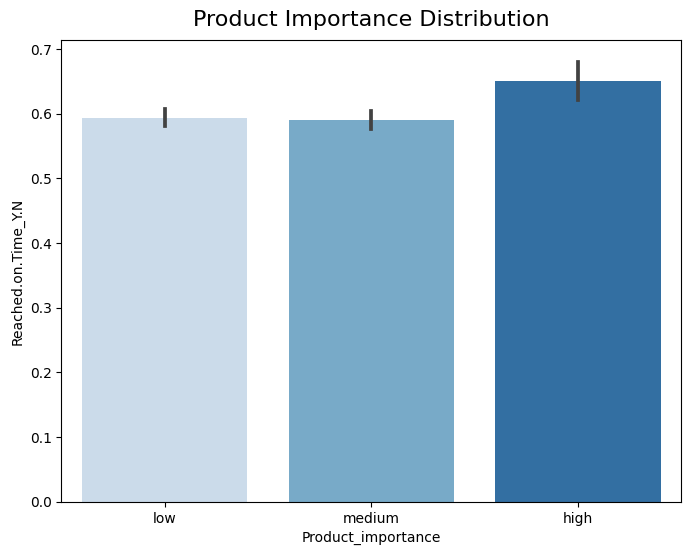

In [578]:
plt.figure(figsize=(8,6))
plt.title('Product Importance Distribution',size=16, pad=10 )
sns.barplot(data = df, x ='Product_importance', y = 'Reached.on.Time_Y.N', palette="Blues")
plt.show()

Insights :
- Dikarenakan Reached.on.Time_Y.N yang bernilai 1 adalah yang terlambat tiba pada konsumen, maka product importance yang paling banyak melakukan keterlambatan pengiriman adalah barang dengan kategori product importance 'high'. seharusnya barang yang dikategorikan sebagai product importance 'high' tiba pada konsumen lebih tepat dibandingkan dengan kategori lainnya.  

In [579]:
df['Product_importance'].value_counts()

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

In [580]:
df2_pivot = df2.pivot_table(index = 'Reached.on.Time_Y.N',
               columns = 'Product_importance',
               values = 'Reached.on.Time_Y.N2',
               aggfunc = len
               ).reset_index(drop=True)
df2_pivot

Product_importance,high,low,medium
0,332,2157,1947
1,616,3140,2807


In [581]:
stat, pvalue, dof, expected = chi2_contingency(df2_pivot)
pvalue

0.002230383104745087

In [582]:
# conclusion
if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Product_importance dan Reached.on.Time_Y.N ada keterkaitan (dependent)
    (Proporsinya TIDAK berbeda signifikan)
    ''')
else :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa antara Product_importance dan Reached.on.Time_Y.N ada keterkaitan (dependent)
    (Proporsinya berbeda signifikan)
    ''')  


    pvalue = 0.00223. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa antara Product_importance dan Reached.on.Time_Y.N ada keterkaitan (dependent)
    (Proporsinya berbeda signifikan)
    


In [583]:
df.groupby('Product_importance')['Reached.on.Time_Y.N'].median()

Product_importance
high      1.0
low       1.0
medium    1.0
Name: Reached.on.Time_Y.N, dtype: float64

<hr>

- Reached.on.Time_Y.N dengan Customer_care_calls

In [584]:
df.groupby('Customer_care_calls')['Reached.on.Time_Y.N'].sum().sort_values()

Customer_care_calls
7     127
2     416
6     523
5    1360
3    2011
4    2126
Name: Reached.on.Time_Y.N, dtype: int64

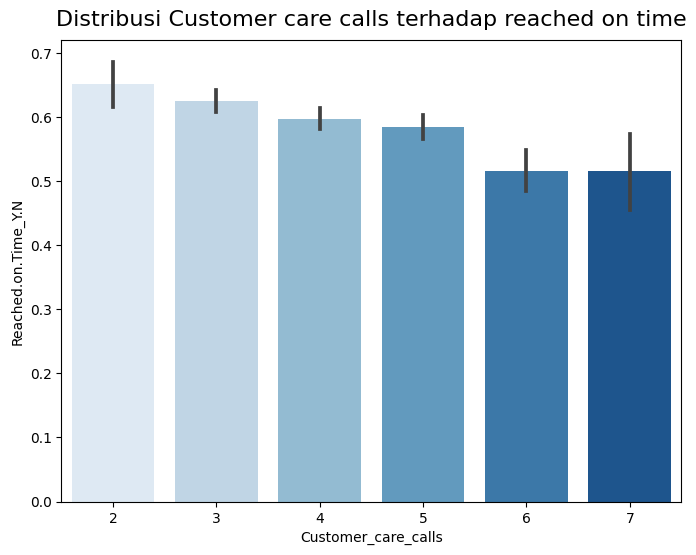

In [585]:
plt.figure(figsize=(8,6))
plt.title('Distribusi Customer care calls terhadap reached on time',size=16, pad=10 )
sns.barplot(data = df, y ='Reached.on.Time_Y.N', x = 'Customer_care_calls', palette="Blues")
plt.show()

Insights :
- Semakin banyak konsumen menghubungi customer care, maka semakin kecil tingkat keterlambatannya. 
- Konsumen yang menghubungi customer care sebanyak 2 kali, paling banyak keterlambatannya.
- Sedangkan konsumen yang menghubungi customer care sebanyak 7 kali, paling sedikit keterlambatannya.

Reached.on.Time_Y.N dengan Customer_care_calls dengan Customer_rating

In [586]:
df.groupby('Reached.on.Time_Y.N')['Customer_rating'].median().sort_values()

Reached.on.Time_Y.N
0    3.0
1    3.0
Name: Customer_rating, dtype: float64

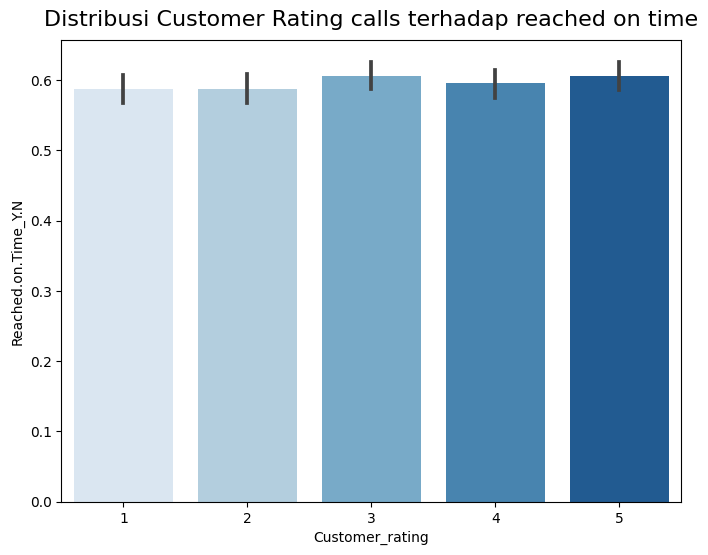

In [587]:
plt.figure(figsize=(8,6))
plt.title('Distribusi Customer Rating calls terhadap reached on time', size=16, pad=10 )
sns.barplot(data = df, y ='Reached.on.Time_Y.N', x = 'Customer_rating', palette="Blues")
plt.show()

Insights :
- Rating 1 s.d 5 tidak berbeda secara signifikan.
- Kinerja pengiriman tidak mempengaruhi konsumen untuk menentukan nilai rating.


In [588]:
df2_pivot = df2.pivot_table(index = 'Reached.on.Time_Y.N',
               columns = 'Customer_rating',
               values = 'Reached.on.Time_Y.N2',
               aggfunc = len
               ).reset_index(drop=True)
df2_pivot

Customer_rating,1,2,3,4,5
0,922,892,882,886,854
1,1313,1273,1357,1303,1317


In [589]:
stat, pvalue, dof, expected = chi2_contingency(df2_pivot)
pvalue

0.5249236018493662

In [590]:
# conclusion
if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Product_importance dan Reached.on.Time_Y.N ada keterkaitan (dependent)
    (Proporsinya TIDAK berbeda signifikan)
    ''')
else :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa antara Product_importance dan Reached.on.Time_Y.N ada keterkaitan (dependent)
    (Proporsinya berbeda signifikan)
    ''')   


    pvalue = 0.52492. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Product_importance dan Reached.on.Time_Y.N ada keterkaitan (dependent)
    (Proporsinya TIDAK berbeda signifikan)
    


In [591]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Weight_status', 'Percent_discount',
       'Discount_status'],
      dtype='object')

Discount_offered dengan Prior_purchases


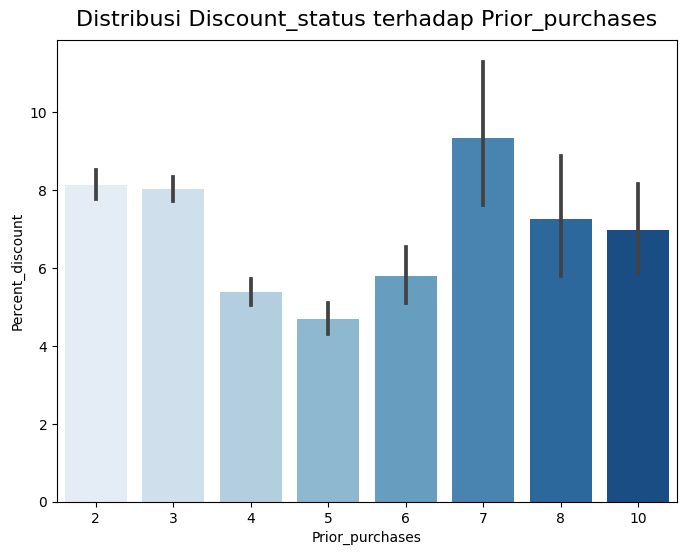

In [592]:
plt.figure(figsize=(8,6))
plt.title('Distribusi Discount_status terhadap Prior_purchases', size=16, pad=10 )
sns.barplot(data = df, y ='Percent_discount', x = 'Prior_purchases', palette="Blues")
plt.show()

Insights :
- Perusahaan tidak memiliki strategi untuk memberikan diskon terhadap konsumen yang loyal (prior_purchasesnya banyak).
- Konsumen dengan prior_purchases 2 diberikan diskon rata-rata sebesar 8%, sedangkan konsumen yang memiliki prior_purchases hingga 10 hanya diberikan diskon 7%.

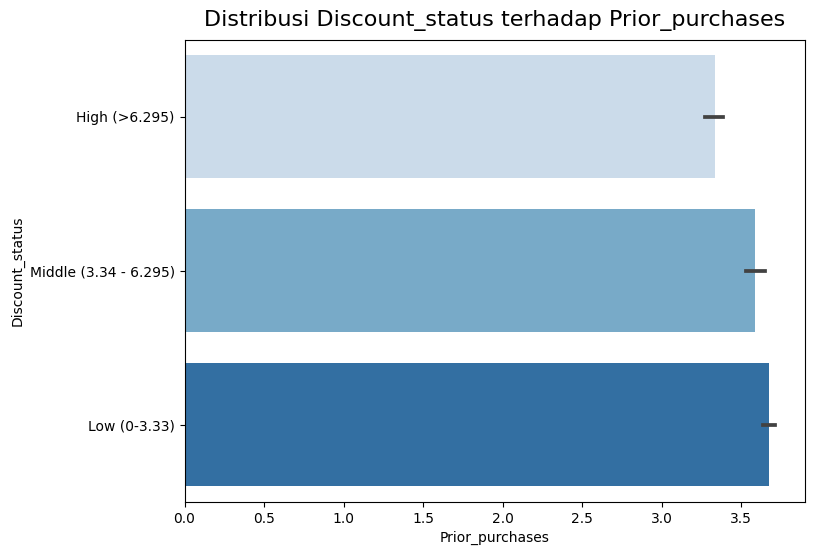

In [593]:
plt.figure(figsize=(8,6))
plt.title('Distribusi Discount_status terhadap Prior_purchases', size=16, pad=10 )
sns.barplot(data = df, y ='Discount_status', x = 'Prior_purchases', palette="Blues")
plt.show()

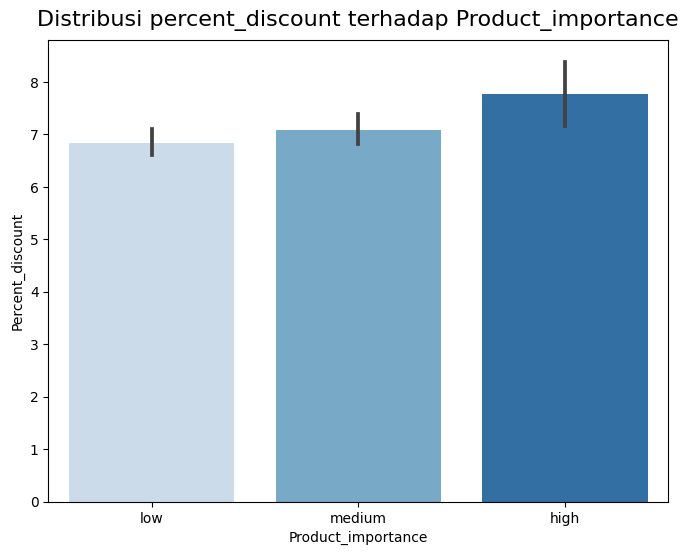

In [594]:
plt.figure(figsize=(8,6))
plt.title('Distribusi percent_discount terhadap Product_importance', size=16, pad=10 )
sns.barplot(data = df, y ='Percent_discount', x = 'Product_importance', palette="Blues")
plt.show()

Insights :
- Produk dengan kategori importancenya high memiliki rata-rata diskon yang lebih tinggi dibandingkan dengan kategori low dan medium.

In [595]:
stat, pvalue = kruskal(
    df[df['Product_importance']=="low"]['Percent_discount'],
    df[df['Product_importance']=="medium"]['Percent_discount'],
    df[df['Product_importance']=="high"]['Percent_discount']
)
pvalue

0.032497742697794915

In [596]:
# conclusion
if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal salah satu kelompok Product_importance ada yang median Percent_discount-nya berbeda.
    ''')
else :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal salah satu kelompok Product_importance ada yang median Percent_discount-nya berbeda.
    ''') 


    pvalue = 0.03250. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal salah satu kelompok Product_importance ada yang median Percent_discount-nya berbeda.
    


Insights
- Perusahaan tidak memiliki strategi untuk memberikan reward kepada konsumennya dalam bentuk discount. 
- Perusahaan memberikan discount tinggi kepada konsumen yang prior purchasesnya sedikit. Sedangkan discount yang rendah kepada konsumen yang prior purchasenya banyak.


# <font color ='yellow'>Conclusion : </font>
- Tidak terdapat perbedaan dari segi jumlah pengiriman kepada konsumen baik pria ataupun wanita.
- Tidak terdapat perbedaan harga barang antara pelanggan pria dengan pelanggan wanita.
- Konsumen wanita tidak lebih banyak menelpon customer_care daripada konsumen pria.
- Warehouse area E mengirim lebih banyak barang dibandingkan dengan warehouse lainnya.
- Perusahaan tidak memiliki strategi untuk menempatkan barang berdasarkan berat untuk memudahkan keluar masuknya barang di warehouse.
- Perusahaan menggunakan mode pengiriman yang paling banyak digunakan adalah Kapal (Ship). 
- Tidak terdapat perbedaan mode pengiriman berdasarkan berat barang. 
- Product_importance 'high' justru yang paling banyak keterlambatan pengirimannya. 
- Semakin sering konsumen menghubungi customer care, maka semakin kecil tingkat keterlambatannya.
- Kinerja pengiriman (keterlambatan) tidak mempengaruhi nilai rating.
- Perusahaan tidak memiliki strategi untuk memberikan diskon terhadap konsumen yang loyal (prior purchasesnya banyak).
- Barang dengan product_importancenya 'high' memiliki diskon yang lebih besar dibandingkan dengan kategori low dan medium.
- Perusahaan tidak memiliki strategi khusus dalam memberikan diskon untuk pelanggan dengan prior_purchasesnya tinggi. 


# <font color ='yellow'>Recommendation :</font>
- Perusahaan harus memiliki strategi untuk menempatkan barang berdasarkan berat untuk kemudahan keluar masuknya barang supaya lebih cepat (re-layout warehouse). 
- Seharusnya perusahaan memprioritaskan barang dengan product_importance high untuk dikirim lebih cepat supaya tidak terlambat sampai di konsumen.
- Seharusnya perusahaan dapat melakukan pengaturan ulang perihal product importance dengan mode pengiriman. 
    - Untuk barang dengan kategori product_importance high dikirim menggunakan pesawat (flight)
    - Untuk barang dengan kategori product_importance medium dikirim menggunakan truk (road)
    - Untuk barang dengan kategori product_importance low dikirim menggunakan kapal (ship)
- Perusahaan harus memfokuskan pada penurunan tingkat keterlambatan barang. 
- Seharusnya perusahaan memiliki promo / diskon khusus untuk pelanggan yang loyal (prior_purchases-nya tinggi)


